# Statistical Analysis

As we covered ways to discover insights with our data in our previous lesson, a different type of analysis to cover is the use of statistics to further enhance our findings. 

In any sort of business, statistical analysis can help the organization make better decisions based on data, employ correct analysis tactics, make accurate predictions, and so much more. Python can be utilized in ways to get these insights with the use of its functions.

## Single Variable Statistics

We will start off with an introduction to the basics of statistics: `mean`, `median` and `mode`.


 1. `Mean`: The average of the dataset. Best used when the distribution is even and the variance is low
 2. `Median`: The middle of the dataset. Best used as a measure of location to mitigate the effect of outliers in the data
 3. `Mode`: The most common number of the dataset. Used to figure out which number is the most prevailant or where the data is most concentrated in. Sometimes, mode will not exist in the data

We can use pandas and use statistical functions to find these insights:

In [1]:
import pandas as pd
import numpy as np

df_grades = pd.read_csv('Student Grades.csv')
df_grades

,StudentID,FirstName,LastName,GradeAverage,Faculty,Tuition,OfficeHoursParticipated,ClassesSkipped
0,20123456,John,Park,B,Arts,44191,0,5
1,20123457,Alex,Great,B,Science,32245,4,10
2,20123458,Sebastian,Taylor,B,Business,42679,6,7
3,20123459,Michael,Bay,A,Math,46478,15,2
4,20123460,Scott,Foster,A,Engineering,36784,5,8
5,20123461,Amy,Winehouse,B,Arts,36537,10,3
6,20123462,Ralph,Wiggins,B,Business,40762,2,8
7,20123463,Homer,Simpson,C,Engineering,47669,4,7
8,20123464,Marge,Simpson,B,Math,39429,10,3
9,20123465,Peter,Gryffin,D,Arts,31956,7,7


In [2]:
df_grades['Tuition'].mean()

40307.066666666666

In [3]:
df_grades['OfficeHoursParticipated'].median()

8.5

In [4]:
df_grades['ClassesSkipped'].mode()

0    3
Name: ClassesSkipped, dtype: int64

In [5]:
# You can also select multiple columns at a time
df_grades[['Tuition','ClassesSkipped']].mean()

Tuition           40307.066667
ClassesSkipped        4.733333
dtype: float64

One of the key concepts in statistics is the idea of `variance` and `standard deviation`. 

1. `Variance` is a statistical measurement of how spread out the numbers are in a dataset
2. `Standard deviation` is a statistical measurement of how spread out the numbers are, but relative to the mean and is calculated as the square root of the variance

When we know how spread out the data is, we can identify insights such as how reliable our predictions will be due to volitility or identify outliers that affect our data.

Keep in mind that pandas will automatically detect values that are numbers to calculate variance and standard deviation and exclude fields that contain letters. However, we must be mindful of columns that are numbers that do not make sense to have variance and standard deviation as they are categorical. For example, `StudentID` have numbers but they are used to classify a student.

With that being said, we can use the `var()` and `std()` function to find the variance and standard deviation of our DataFrame.

In [6]:
# Variance of entire DataFrame
df_grades.var(numeric_only=True)

StudentID                  7.750000e+01
Tuition                    3.355516e+07
OfficeHoursParticipated    4.160920e+01
ClassesSkipped             9.167816e+00
dtype: float64

In [7]:
# Standard deviation of entire DataFrame
df_grades.std(numeric_only=True)

StudentID                     8.803408
Tuition                    5792.681196
OfficeHoursParticipated       6.450519
ClassesSkipped                3.027840
dtype: float64

In [8]:
# Variance of specific column
df_grades['Tuition'].var()

33555155.44367816

In [9]:
# Standard deviation of specific column
df_grades['Tuition'].std()

5792.681196447648

We can also see a snapshot of all the column statistics with the `describe()` function as well:


In [10]:
df_grades.describe()

,StudentID,Tuition,OfficeHoursParticipated,ClassesSkipped
count,3.000000e+01,30.000000,30.000000,30.000000
mean,2.012347e+07,40307.066667,9.333333,4.733333
std,8.803408e+00,5792.681196,6.450519,3.027840
min,2.012346e+07,31210.000000,0.000000,0.000000
25%,2.012346e+07,34824.750000,5.000000,2.250000
50%,2.012347e+07,40905.000000,8.500000,4.000000
75%,2.012348e+07,44870.500000,11.500000,7.000000
max,2.012348e+07,49682.000000,25.000000,10.000000


## Z-score

A `z-score` is a measurement that describes the distance a value is from the mean of a normal data distribution. `Z-score` is measured in terms of `standard deviations`. A `z-score` typically tells us how far a value is in standard deviations, so that we can understand it in a scaled value.

A `z-score` can be calculated using the following formula: z = (X – μ) / σ


X is the single input value

μ is the population mean

σ is the population standard deviation


With this, we can calculate the standard deviation of each student's participation in office hours to see who spends the most time.

In [7]:
mean = df_grades['OfficeHoursParticipated'].mean() 
std = df_grades['OfficeHoursParticipated'].std()

In [8]:
df_grades['z-score'] = (df_grades['OfficeHoursParticipated'] - mean)/std

In [9]:
df_grades

,StudentID,FirstName,LastName,GradeAverage,Faculty,Tuition,OfficeHoursParticipated,ClassesSkipped,z-score
0,20123456,John,Park,B,Arts,44191,0,5,-1.446912
1,20123457,Alex,Great,B,Science,32245,4,10,-0.826807
2,20123458,Sebastian,Taylor,B,Business,42679,6,7,-0.516754
3,20123459,Michael,Bay,A,Math,46478,15,2,0.878482
4,20123460,Scott,Foster,A,Engineering,36784,5,8,-0.671781
5,20123461,Amy,Winehouse,B,Arts,36537,10,3,0.103351
6,20123462,Ralph,Wiggins,B,Business,40762,2,8,-1.136859
7,20123463,Homer,Simpson,C,Engineering,47669,4,7,-0.826807
8,20123464,Marge,Simpson,B,Math,39429,10,3,0.103351
9,20123465,Peter,Gryffin,D,Arts,31956,7,7,-0.361728


## Identifying Outliers

`Outliers` are defined as data points that are abnormally far from what is considered "normal". Sometimes, outliers causes hinderance to our data, as they might be there due to errors and it is up to us to decide if these abnormal data are to be included. Before we start identifying outliers, we are going to add a new column to our DataFrame `GPA`, based on the `GradeAverage` of the students. We will create this using the `np.select` function.


In [10]:
# np.select ([list of categories], [list of categories to be replaced, in the same order])
df_grades['GPA'] = np.select([df_grades['GradeAverage'] == 'A', 
                              df_grades['GradeAverage'] == 'B', 
                              df_grades['GradeAverage'] == 'C',
                              df_grades['GradeAverage'] == 'D',
                              df_grades['GradeAverage'] == 'F'],
                             [4,3,2,1,0])

df_grades                   

,StudentID,FirstName,LastName,GradeAverage,Faculty,Tuition,OfficeHoursParticipated,ClassesSkipped,z-score,GPA
0,20123456,John,Park,B,Arts,44191,0,5,-1.446912,3
1,20123457,Alex,Great,B,Science,32245,4,10,-0.826807,3
2,20123458,Sebastian,Taylor,B,Business,42679,6,7,-0.516754,3
3,20123459,Michael,Bay,A,Math,46478,15,2,0.878482,4
4,20123460,Scott,Foster,A,Engineering,36784,5,8,-0.671781,4
5,20123461,Amy,Winehouse,B,Arts,36537,10,3,0.103351,3
6,20123462,Ralph,Wiggins,B,Business,40762,2,8,-1.136859,3
7,20123463,Homer,Simpson,C,Engineering,47669,4,7,-0.826807,2
8,20123464,Marge,Simpson,B,Math,39429,10,3,0.103351,3
9,20123465,Peter,Gryffin,D,Arts,31956,7,7,-0.361728,1


Data that is far outside the `interquartile range (IQR)` is identified as an outlier, also known as the`IQR rule`. The `IQR` is a measure of how 50% of the "middle" of the data is spread out.

The `IQR` is calculated by subtracting the 75th percentile data point (third quartile) with the 25th percentile data point (first quartile). 

The `IQR rule` is calculated by multipying the `IQR` by 1.5 and adding it to the third quartile and subtracting it from the first quartile. If a number is greater than the third quartile or less than the first quartile after the addition/subtraction, then it can be seen as an outlier.

 Example: 

 * IQR = 20 
 
 * Q3 = 70
 
 * Q1 = 50
 
 * IQR x 1.5 = 30
 
 * Q3 + 30 = 100 --> Anything above 100 is considered an outlier for this dataset 
 
 * Q1 - 30 = 20 --> Anything below 20 is considered an outlier for this dataset
 
 
With this logic, we can identify if any students have a GPA that is an outlier and add this to our data.

In [15]:
# np.percentile finds the specified percentile of an array
q3 = np.percentile(df_grades['GPA'], 75)
q1 = np.percentile(df_grades['GPA'], 25)
IQR = q3 - q1
IQR

1.0

In [16]:
# Define IQR rule for the GPA column
IQR_rule = (1.5*IQR + q3 < df_grades['GPA']) | (q1 - 1.5*IQR > df_grades['GPA'])

# use np.where to create 'Outlier' column, is a student's GPA an outlier or not
df_grades['Outlier'] = np.where(IQR_rule, 'yes', 'no')
df_grades

,StudentID,FirstName,LastName,GradeAverage,Faculty,Tuition,OfficeHoursParticipated,ClassesSkipped,z-score,GPA,Outlier
0,20123456,John,Park,B,Arts,44191,0,5,-1.446912,3,no
1,20123457,Alex,Great,B,Science,32245,4,10,-0.826807,3,no
2,20123458,Sebastian,Taylor,B,Business,42679,6,7,-0.516754,3,no
3,20123459,Michael,Bay,A,Math,46478,15,2,0.878482,4,no
4,20123460,Scott,Foster,A,Engineering,36784,5,8,-0.671781,4,no
5,20123461,Amy,Winehouse,B,Arts,36537,10,3,0.103351,3,no
6,20123462,Ralph,Wiggins,B,Business,40762,2,8,-1.136859,3,no
7,20123463,Homer,Simpson,C,Engineering,47669,4,7,-0.826807,2,no
8,20123464,Marge,Simpson,B,Math,39429,10,3,0.103351,3,no
9,20123465,Peter,Gryffin,D,Arts,31956,7,7,-0.361728,1,yes


## Correlation

So far, we have covered statistics that summarize the aspects of a single column of data. Now, we will explore how to use `correlation` to see how two columns of data will interact with one another.

`Correlation` is the method to evaluate the strength of a relationship between two continous variables. This not only shows the direction between two variables, but also the magnitude of the relationship. `Correlation` values are between -1 and 1, with -1 being the highest value indirectly proportional, and 1 being the highest value directly proportional.

To get an overall snapshot of `correlation` in our DataFrame, we can use the `corr()` function.


In [13]:
df_grades.corr(numeric_only=True)

,StudentID,Tuition,OfficeHoursParticipated,ClassesSkipped,z-score,GPA
StudentID,1.000000,0.070770,0.214961,-0.019405,0.214961,0.097146
Tuition,0.070770,1.000000,0.076881,-0.218489,0.076881,0.010008
OfficeHoursParticipated,0.214961,0.076881,1.000000,-0.669723,1.000000,0.364155
ClassesSkipped,-0.019405,-0.218489,-0.669723,1.000000,-0.669723,-0.315592
z-score,0.214961,0.076881,1.000000,-0.669723,1.000000,0.364155
GPA,0.097146,0.010008,0.364155,-0.315592,0.364155,1.000000


We see that based on the `correlation` function, there is a strong correlation negatively between `ClassesSkipped` and `GPA`, whereas there is a strong positive correlation between `OfficeHoursParticipated` and `GPA`. This makes sense as student skip more classes, the more likely their grades will drop, and the more office hours are attended, the more likely their grades will rise due to more support.

However, as more data is added into the DataFrame, it may be hard to interpret the data by looking at just numbers. The best way to see a correlation matrix is with the use of a heatmap.

Below is a simple heatmap created by `Seaborn`, which is a visualization package that we will cover in a later chapter. With the colors, we are more easily able to identify strong correlations without having to scan individual numbers in the matrix.

<Axes: >

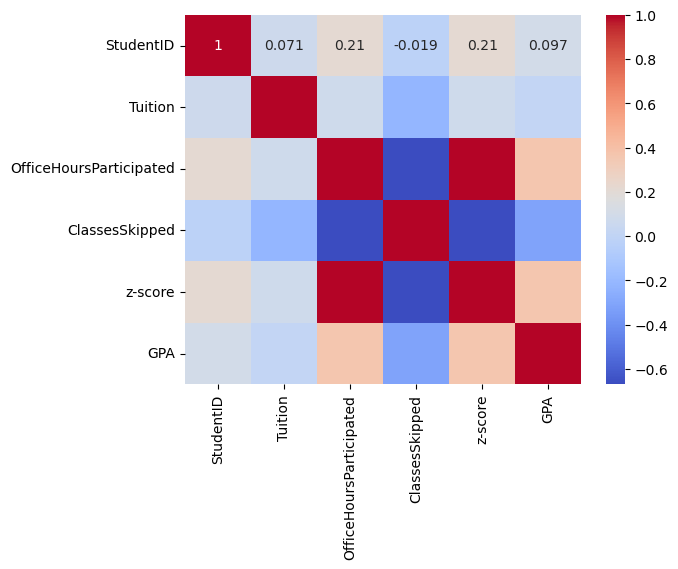

In [16]:
import seaborn as sns
sns.heatmap(df_grades.corr(numeric_only=True), cmap='coolwarm', annot = True)